# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
 

In [3]:
city_data_df = pd.DataFrame(cities)
city_data_df.rename(columns = {0:'City'}, inplace = True)
city_data_df['Cloudiness'] = ""
city_data_df['Country'] = ""
city_data_df['Date'] = ""
city_data_df['Humidity'] = ""
city_data_df['Lat'] = ""
city_data_df['Lng'] = ""
city_data_df['Max Temp'] = ""
city_data_df['Wind Speed'] = ""
city_data_df.set_index('City',inplace = True)
city_data_df.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
avarua,,,,,,,,
saint george,,,,,,,,
dasoguz,,,,,,,,
albany,,,,,,,,
ushuaia,,,,,,,,


In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [5]:
for counter,city in enumerate(cities):
    
    response = requests.get(query_url + city).json()

    try:
        city_data_df.loc[city, 'Cloudiness'] = response['clouds']['all']
        city_data_df.loc[city, 'Country'] = response['sys']['country']
        city_data_df.loc[city, 'Date'] = response['dt']
        city_data_df.loc[city, 'Humidity'] = response['main']['humidity']
        city_data_df.loc[city, 'Lat'] = response['coord']['lat']
        city_data_df.loc[city, 'Lng'] = response['coord']['lon']
        city_data_df.loc[city, 'Max Temp'] = response['main']['temp_max']
        city_data_df.loc[city, 'Wind Speed'] = response['wind']['speed']
        print(counter,city)
    except (KeyError):
        print(f"Problem with the data for {city}")

0 avarua
1 saint george
2 dasoguz
3 albany
4 ushuaia
5 jam sahib
6 sao joao da barra
7 saskylakh
8 yellowknife
9 bluff
10 busselton
11 novyy urengoy
12 kahului
Problem with the data for belushya guba
14 shieli
15 hilo
16 olinda
17 vaini
18 marzuq
19 thompson
20 kodiak
21 hobart
22 kirakira
23 hithadhoo
24 yar-sale
25 rikitea
26 touros
27 mataura
28 saint-augustin
29 port-gentil
30 marawi
31 oranjemund
32 atuona
33 sibolga
34 george town
35 comodoro rivadavia
36 tasiilaq
37 port elizabeth
38 belo horizonte
39 leticia
40 bandarbeyla
41 longyearbyen
42 cidreira
43 humberto de campos
44 belaya gora
45 bairiki
46 eyl
47 kaifeng
48 georgetown
49 big rapids
50 salalah
51 trzebinia
52 cabo san lucas
53 pevek
54 gat
55 tuatapere
56 novobirilyussy
57 port alfred
58 batagay
59 ostrovnoy
60 vardo
61 myanaung
62 east london
63 bengkulu
64 awbari
65 punta arenas
66 los llanos de aridane
67 odweyne
68 zhigansk
69 raudeberg
70 meulaboh
71 luanda
Problem with the data for gumushane
73 songea
74 tilichi

554 vostok
555 itoman
Problem with the data for tumannyy
557 atar
558 tromso
559 aripuana
560 tenerife
561 udachnyy
562 dubti
563 altay
564 mozarlandia
565 ishigaki
566 filimonovo
567 khandagayty
568 mogadishu
569 dzhebariki-khaya
Problem with the data for tidore
571 asyut
572 azua
573 alekseyevsk
574 lengshuitan
575 sheopur
576 kawalu
577 sandwick
578 bagdarin
579 channel-port aux basques
580 hualmay
581 thinadhoo
582 namibe
583 qasigiannguit
584 severnyy
585 opuwo
586 muisne
587 petropavlovsk-kamchatskiy
588 jiuquan
589 maxixe
590 sobreira
591 norman wells
592 siparia
593 tazovskiy
Problem with the data for gurgan
Problem with the data for louisbourg
596 pacific grove
597 monrovia
598 union
599 puerto del rosario
600 havre-saint-pierre
601 likasi
602 chumikan
603 morinville


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_df.drop(city_data_df[city_data_df['Date'] == ''].index, inplace = True)
city_data_df.reset_index(inplace=True)
city_data_df.index.names = ["City_ID"]
city_data_df.head()0

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,avarua,79,CK,1595624318,65,-21.21,-159.78,77,4.7
1,saint george,1,US,1595624173,26,37.1,-113.58,95,10.29
2,dasoguz,62,TM,1595624319,42,41.84,59.97,80.6,8.39
3,albany,65,US,1595624102,42,42.6,-73.97,91,3.2
4,ushuaia,90,AR,1595624118,95,-54.8,-68.3,32,5.82


In [7]:
city_data_df.to_csv (r'C:\Users\rippt\Desktop\Data Analytics HW Repos\python-api-challenge\output_data\city_data.csv', index = True, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
len(city_data_df)

559

In [11]:
city_data_df.drop(city_data_df[city_data_df['Humidity'] > 100].index, inplace = True)
len(city_data_df)

559

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

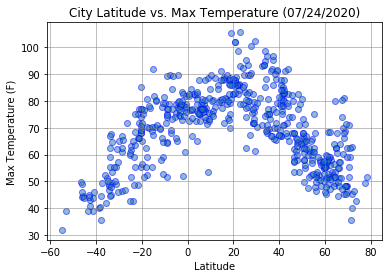

<Figure size 432x288 with 0 Axes>

In [75]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = .5, edgecolors='b')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (07/24/2020)')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()
plt.savefig("../weather_output_data/Fig 1.png")

#### Analysis:

## Latitude vs. Humidity Plot

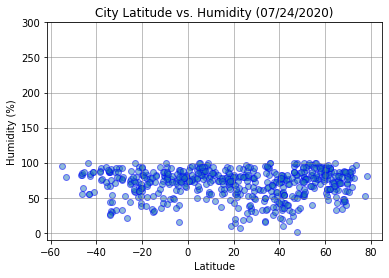

<Figure size 432x288 with 0 Axes>

In [76]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = .5, edgecolors='b')
plt.ylim(-10,300)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (07/24/2020)')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()
plt.savefig("../weather_output_data/Fig 2.png")

#### Analysis:

## Latitude vs. Cloudiness Plot

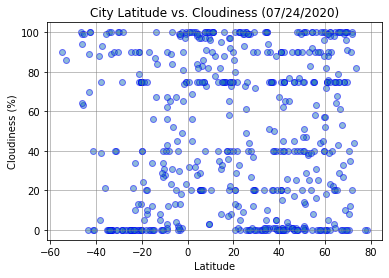

<Figure size 432x288 with 0 Axes>

In [77]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = .5, edgecolors='b')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (07/24/2020)')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()
plt.savefig("../weather_output_data/Fig 3.png")

#### Analysis:

## Latitude vs. Wind Speed Plot

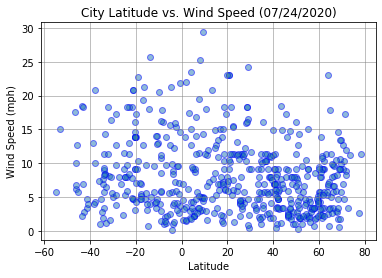

<Figure size 432x288 with 0 Axes>

In [78]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = .5, edgecolors='b')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (07/24/2020)')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()
plt.savefig("../weather_output_data/Fig 4.png")

#### Analysis:

## Linear Regression

In [79]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df[city_data_df['Lat']>=0]
southern_df = city_data_df[city_data_df['Lat']<0]

In [80]:
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
1,saint george,1,US,1595624173,26,37.1,-113.58,95,10.29
2,dasoguz,62,TM,1595624319,42,41.84,59.97,80.6,8.39
3,albany,65,US,1595624102,42,42.6,-73.97,91,3.2
5,jam sahib,0,PK,1595624319,66,26.3,68.63,89.6,11.41
7,saskylakh,100,RU,1595624319,88,71.92,114.08,45.5,8.93


In [81]:
northern_df = northern_df[['Cloudiness','Humidity','Lat','Lng','Max Temp','Wind Speed']].astype(float)
northern_df.dtypes

Cloudiness    float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [82]:
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,avarua,79,CK,1595624318,65,-21.21,-159.78,77,4.7
4,ushuaia,90,AR,1595624118,95,-54.8,-68.3,32,5.82
6,sao joao da barra,0,BR,1595624319,73,-21.64,-41.05,75.2,18.34
9,bluff,100,NZ,1595624320,83,-46.6,168.33,49.98,17.54
10,busselton,89,AU,1595624320,75,-33.65,115.33,45,14.29


In [83]:
southern_df = southern_df[['Cloudiness','Humidity','Lat','Lng','Max Temp','Wind Speed']].astype(float)
southern_df.dtypes

Cloudiness    float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [84]:
# OPTIONAL: Create a function to create Linear Regression plots

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

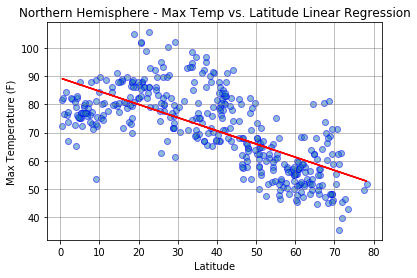

<Figure size 432x288 with 0 Axes>

In [85]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 5.png")

#### Analysis:

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

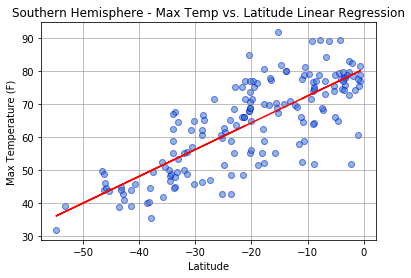

<Figure size 432x288 with 0 Axes>

In [86]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 6.png")

#### Analysis:

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

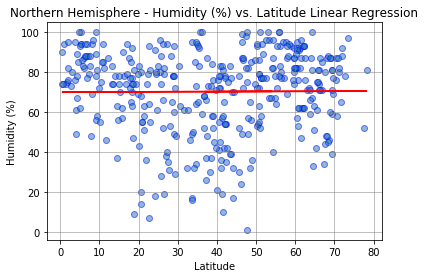

<Figure size 432x288 with 0 Axes>

In [87]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 7.png")

#### Analysis:

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

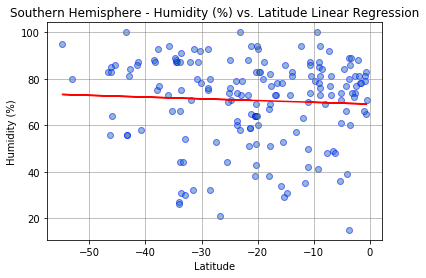

<Figure size 432x288 with 0 Axes>

In [88]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 8.png")

#### Analysis:

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

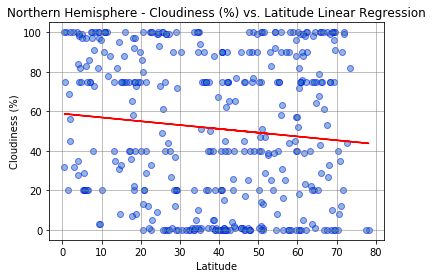

<Figure size 432x288 with 0 Axes>

In [89]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 9.png")

#### Analysis:

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

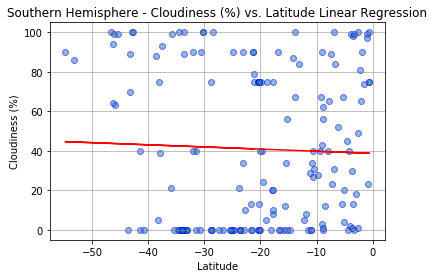

<Figure size 432x288 with 0 Axes>

In [90]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 10.png")

#### Analysis:

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

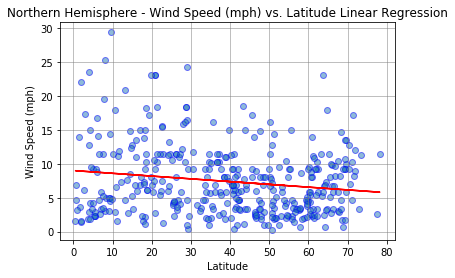

<Figure size 432x288 with 0 Axes>

In [91]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 11.png")

#### Analysis:

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

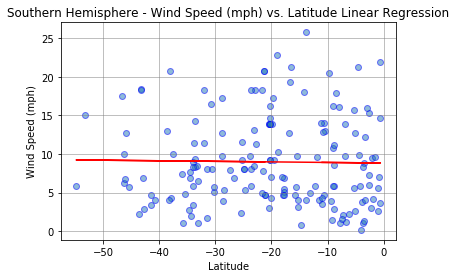

<Figure size 432x288 with 0 Axes>

In [92]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, alpha = .5, edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("../weather_output_data/Fig 12.png")

#### Analysis: